In [1]:
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df_bp =[]
df_bp = pd.read_csv('C:/Users/Kuzmins/Documents/Jupiter/VKRregress/X_bp.csv')
df_nup =[]
df_nup = pd.read_csv('C:/Users/Kuzmins/Documents/Jupiter/VKRregress/X_nup.csv')

In [3]:
df = df_bp.merge(df_nup, left_on = 'Unnamed: 0', right_on = 'Unnamed: 0')
df

Unnamed: 0  Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  \
0              0                        1.857143     2030.000000   
1              1                        1.857143     2030.000000   
2              2                        1.857143     2030.000000   
3              3                        1.857143     2030.000000   
4              4                        2.771331     2030.000000   
...          ...                             ...             ...   
1018        1018                        2.271346     1952.087902   
1019        1019                        3.444022     2050.089171   
1020        1020                        3.280604     1972.372865   
1021        1021                        3.705351     2066.799773   
1022        1022                        3.808020     1890.413468   

      Modul_Uprugosti_GPa  Kolichestvo_napolnitela_m%  \
0              738.736842                   30.000000   
1              738.736842                   50.000000   
2              738.736842                   49.900000   
3              738.736842                  129.000000   
4              753.000000                  111.860000   
...                   ...                         ...   
1018           912.855545                   86.992183   
1019           444.732634                  145.981978   
1020           416.836523                  110.533477   
1021           741.475517                  141.397963   
1022           417.316232                  129.183416   

      Soderjanie_epoxidnih_grupp_%_2  Temp_vspishki_C_2  \
0                          22.267857         100.000000   
1                          23.750000         284.615385   
2                          33.000000         284.615385   
3                          21.250000         300.000000   
4                          22.267857         284.615385   
...                              ...                ...   
1018                       20.123249         324.774576   
1019                       19.599769         254.215401   
1020                       23.957502         248.423047   
1021                       19.246945         275.779840   
1022                       27.474763         300.952708   

      Poverhnostnaia_plotnost_g/m2  Modul_uprugosti_pri_rastiajenii_GPa  \
0                       210.000000                            70.000000   
1                       210.000000                            70.000000   
2                       210.000000                            70.000000   
3                       210.000000                            70.000000   
4                       210.000000                            70.000000   
...                            ...                                  ...   
1018                    209.198700                            73.090961   
1019                    350.660830                            72.920827   
1020                    740.142791                            74.734344   
1021                    641.468152                            74.042708   
1022                    758.747882                            74.309704   

      Prochnost_pri_rastiajenii_Mpa  Potreblenie_smoli_g/m2  \
0                       3000.000000              220.000000   
1                       3000.000000              220.000000   
2                       3000.000000              220.000000   
3                       3000.000000              220.000000   
4                       3000.000000              220.000000   
...                             ...                     ...   
1018                    2387.292495              125.007669   
1019                    2360.392784              117.730099   
1020                    2662.906040              236.606764   
1021                    2071.715856              197.126067   
1022                    2856.328932              194.754342   

      Ugol_nashivki_grad  Shag_nashivki  Plotnost_nashivki  
0                      0       4.000000          57.000000  
1              

In [4]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)
# Пропуски
df.isnull().values.any()

False

Sootnoshenie_Matrix_napolnitel


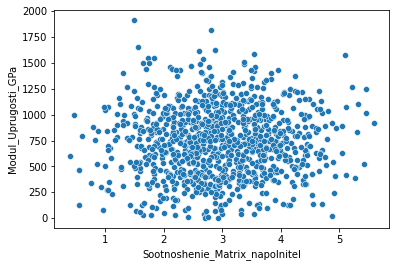

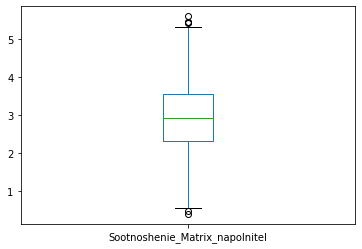




Plotnost_kg/m3


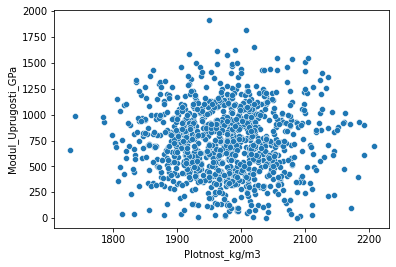

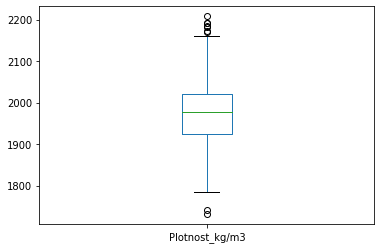




Modul_Uprugosti_GPa


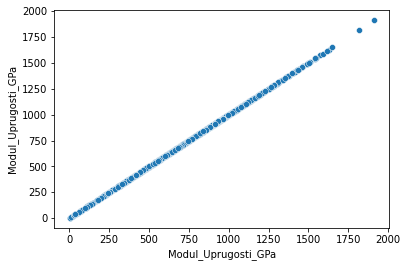

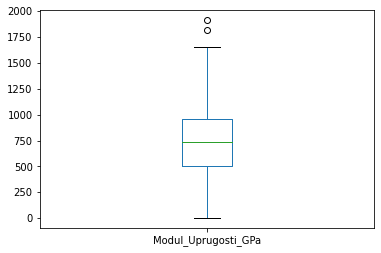




Kolichestvo_napolnitela_m%


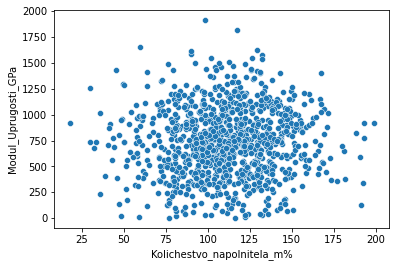

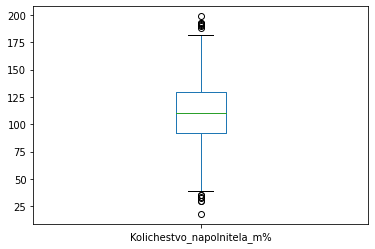




Soderjanie_epoxidnih_grupp_%_2


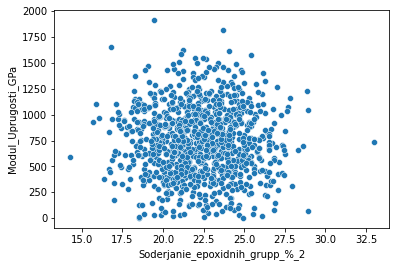

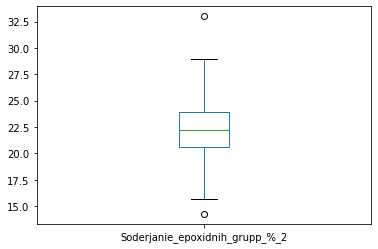




Temp_vspishki_C_2


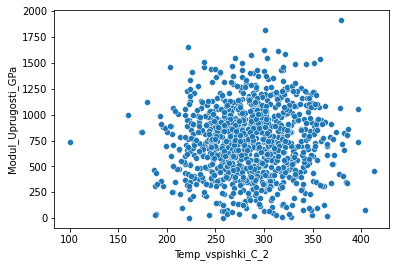

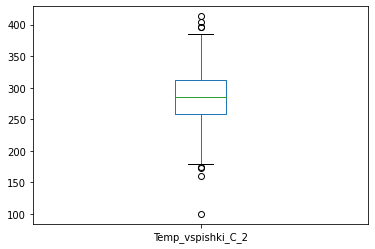




Poverhnostnaia_plotnost_g/m2


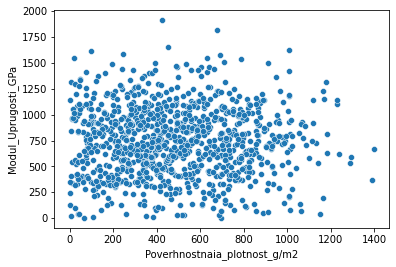

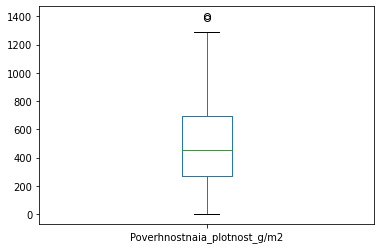




Modul_uprugosti_pri_rastiajenii_GPa


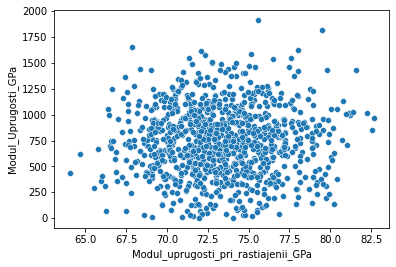

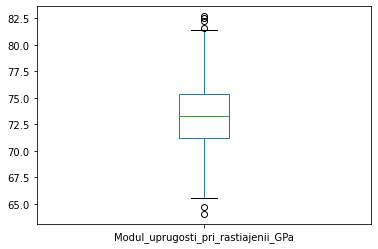




Prochnost_pri_rastiajenii_Mpa


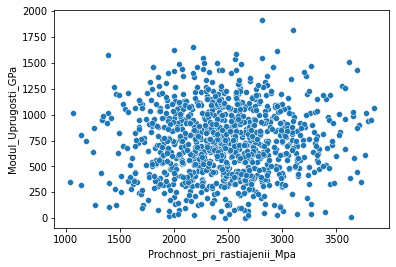

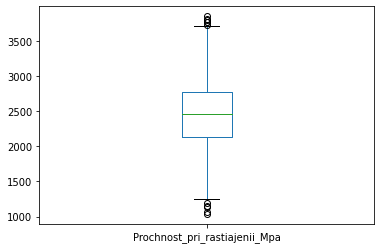




Potreblenie_smoli_g/m2


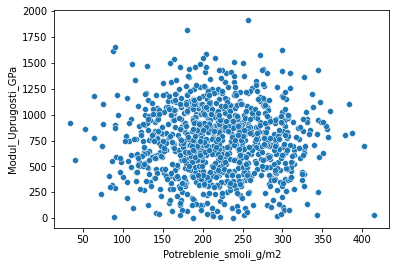

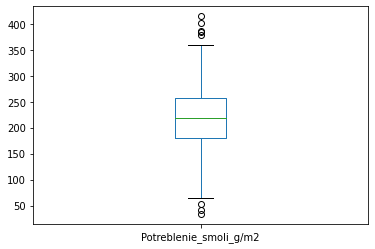




Ugol_nashivki_grad


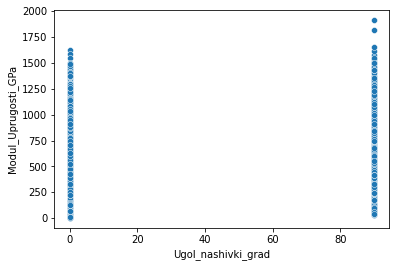

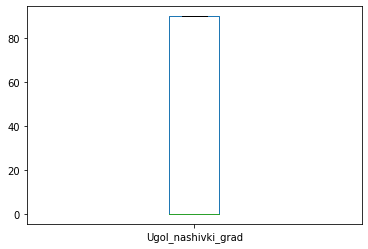




Shag_nashivki


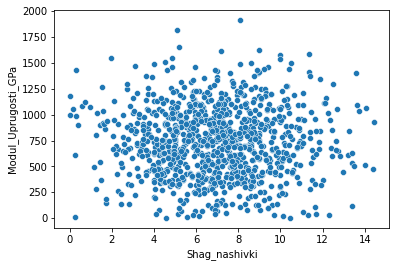

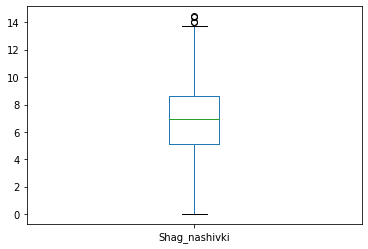




Plotnost_nashivki


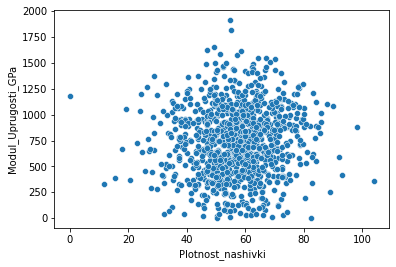

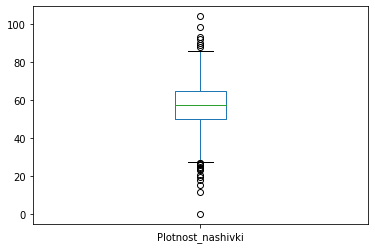

In [5]:
for column in df:
    print(column)
    sns.scatterplot(x = column , y = "Modul_Uprugosti_GPa", data = df);
    plt.show()
    df.boxplot(column = column, grid = False)
    plt.show()
    print('\n\n')
    

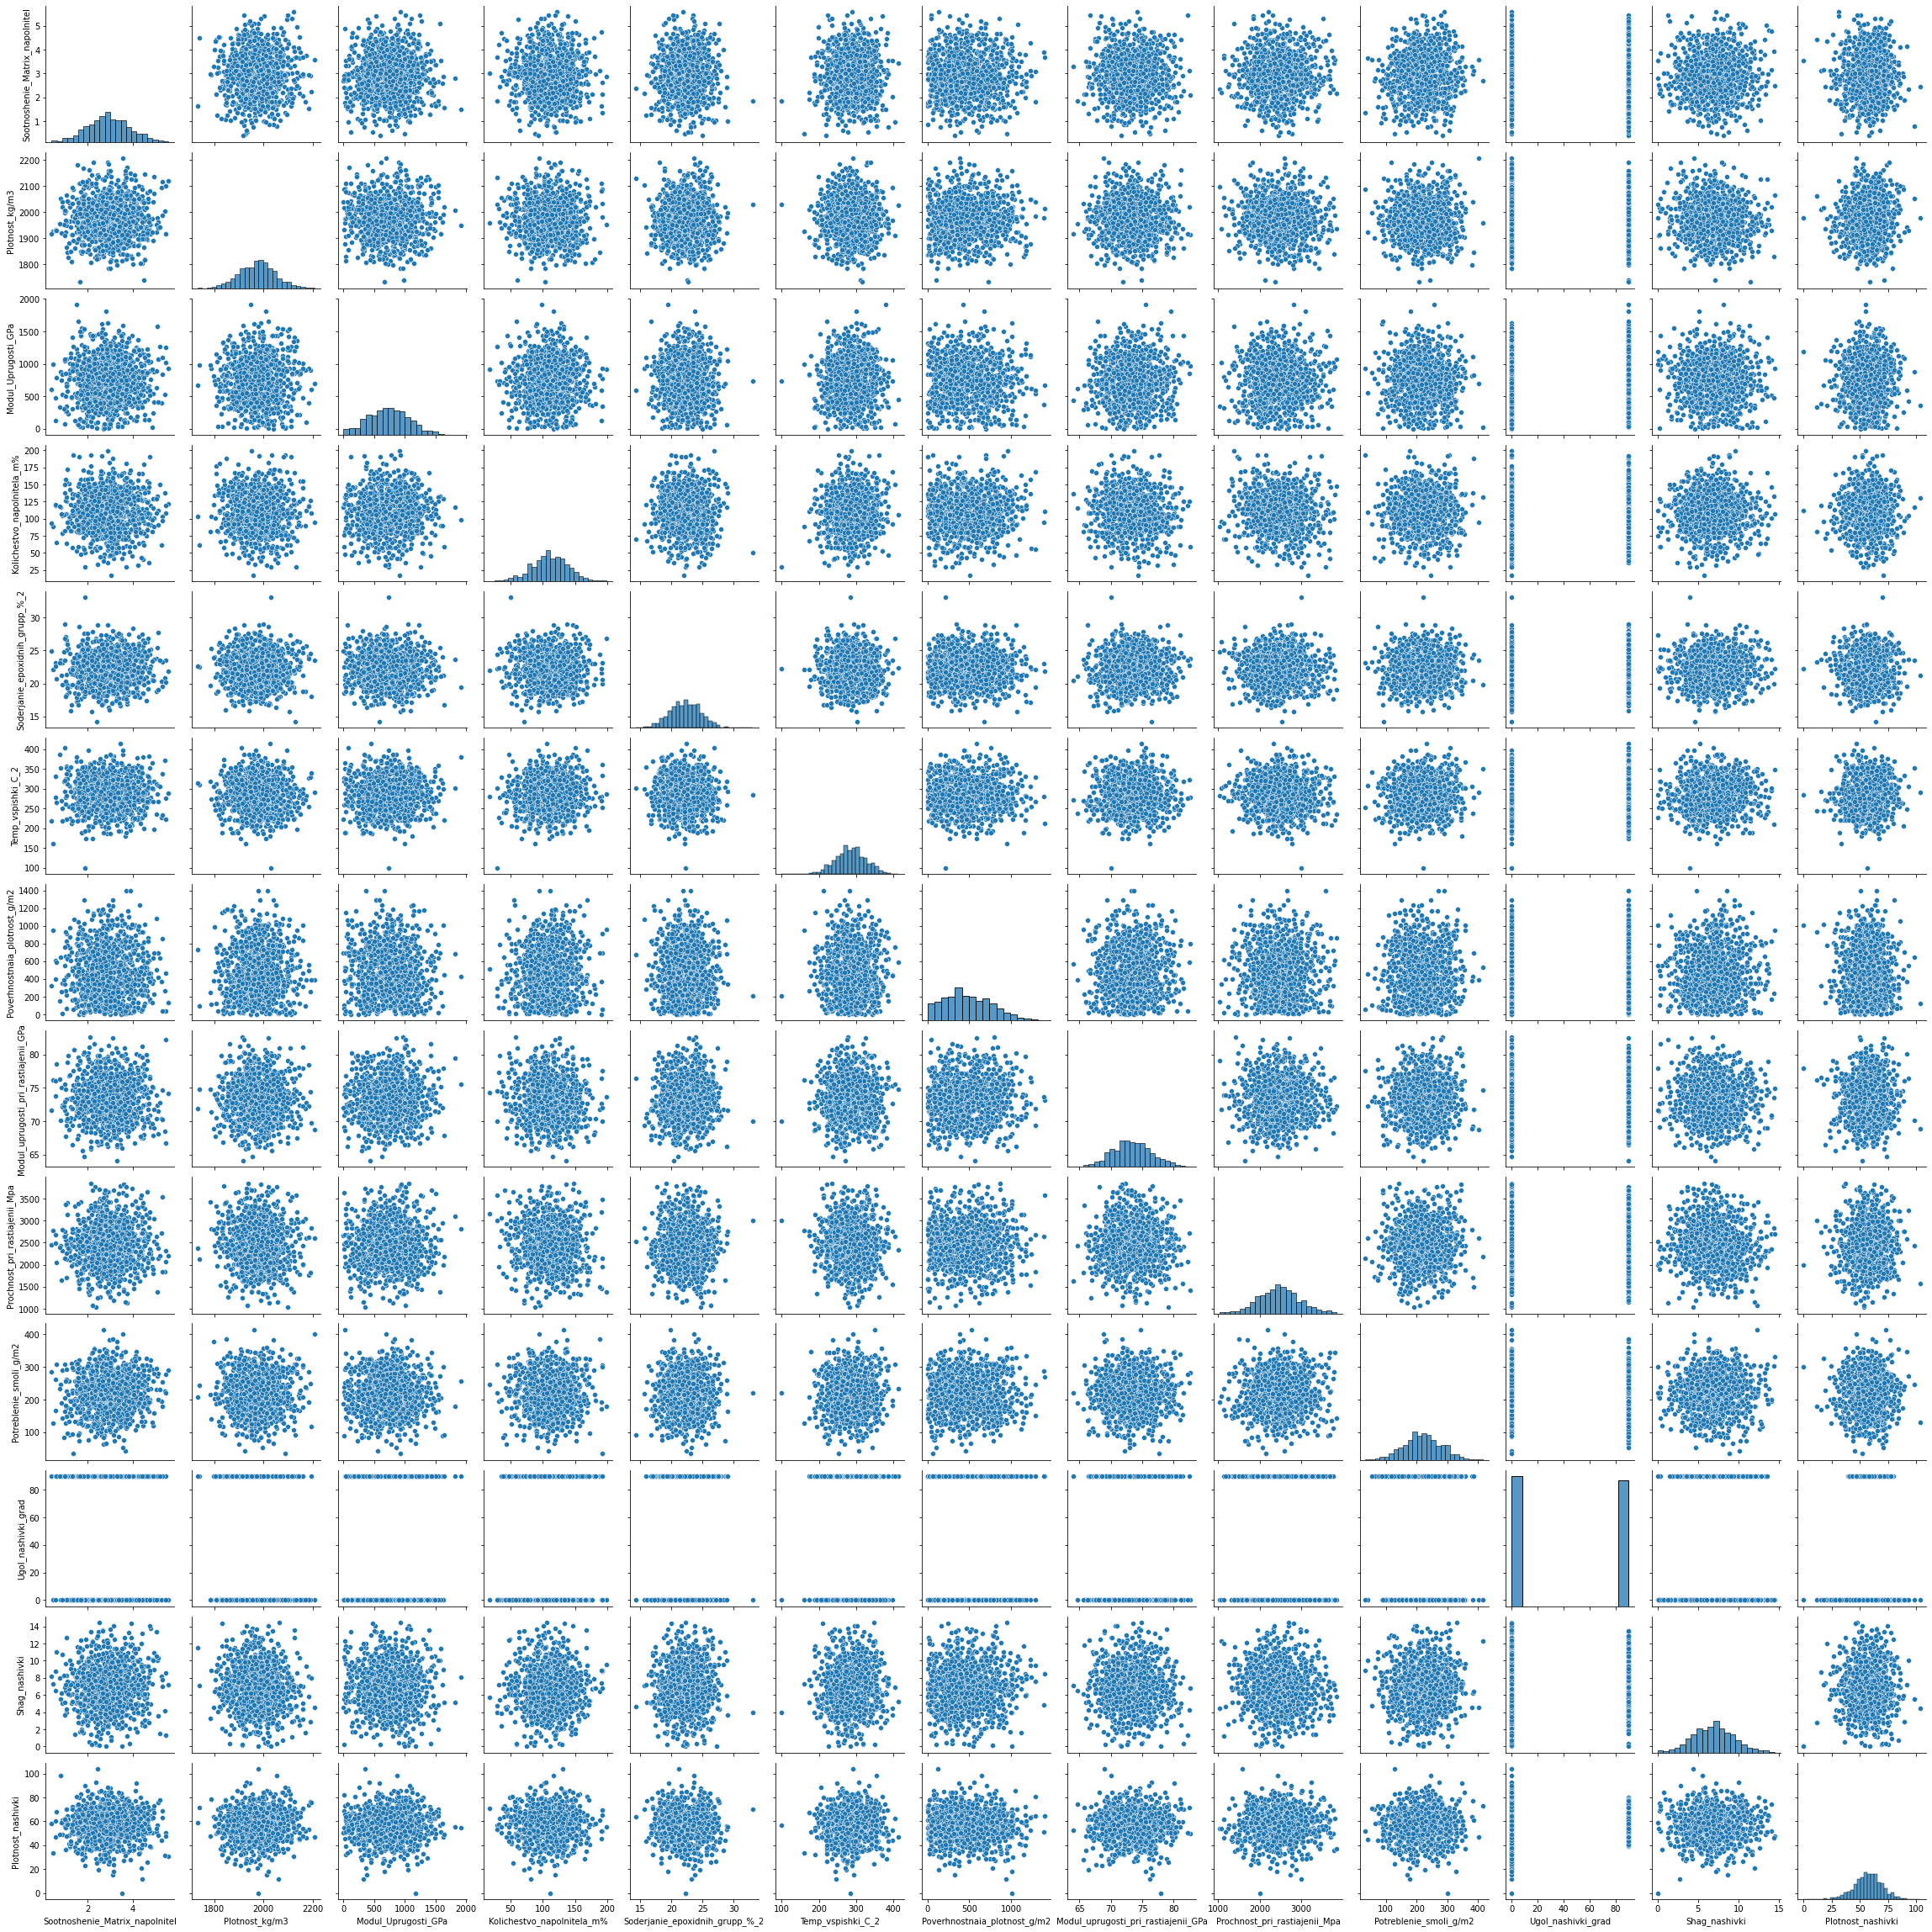

In [6]:
sns.pairplot(df)
plt.savefig('matrix1.png')

<AxesSubplot:>

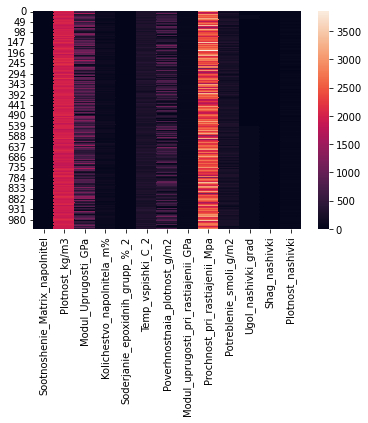

In [7]:
sns.heatmap(df)

In [8]:
df.describe()

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
count                     1023.000000     1023.000000          1023.000000   
mean                         2.930366     1975.734888           739.923233   
std                          0.913222       73.729231           330.231581   
min                          0.389403     1731.764635             2.436909   
25%                          2.317887     1924.155466           500.047452   
50%                          2.906878     1977.621657           739.664328   
75%                          3.552660     2021.374374           961.812526   
max                          5.591742     2207.773481          1911.536477   

       Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
count                 1023.000000                     1023.000000   
mean                   110.570769                       22.244390   
std                     28.295911                        2.406301   
min                     17.740275                       14.254986   
25%                     92.443497                       20.608034   
50%                    110.564840                       22.230744   
75%                    129.730366                       23.961934   
max                    198.953207                       33.000000   

       Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
count        1023.000000                   1023.000000   
mean          285.882151                    482.731833   
std            40.943260                    281.314690   
min           100.000000                      0.603740   
25%           259.066528                    266.816645   
50%           285.896812                    451.864365   
75%           313.002105                    693.225017   
max           413.273418                   1399.542362   

       Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
count                          1023.000000                    1023.000000   
mean                             73.328571                    2466.922843   
std                               3.118983                     485.628006   
min                              64.054061                    1036.856605   
25%                              71.245018                    2135.850448   
50%                              73.268805                    2459.524526   
75%                              75.356612                    2767.193119   
max                              82.682051                    3848.436732   

       Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
count             1023.000000         1023.000000    1023.000000   
mean               218.423144           44.252199       6.899222   
std                 59.735931           45.015793       2.563467   
min                 33.803026            0.000000       0.000000   
25%                179.627520            0.000000       5.080033   
50%                219.198882            0.000000       6.916144   
75%                257.481724           90.000000       8.586293   
max                414.590628           90.000000      14.440522   

       Plotnost_nashivki  
count        1023.000000  
mean           57.153929  
std            12.350969  
min             0.000000  
25%            49.799212  
50%            57.341920  
75%            64.944961  
max           103.988901

In [9]:
dfp = df.copy(deep = True)

In [10]:
#Remove outliers
for x in dfp:
    q75,q25 = np.percentile(dfp.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    dfp.loc[dfp[x] < min,x] = np.nan
    dfp.loc[dfp[x] > max,x] = np.nan
dfp.head()

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
0                        1.857143          2030.0           738.736842   
1                        1.857143          2030.0           738.736842   
2                        1.857143          2030.0           738.736842   
3                        1.857143          2030.0           738.736842   
4                        2.771331          2030.0           753.000000   

   Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
0                         NaN                       22.267857   
1                       50.00                       23.750000   
2                       49.90                             NaN   
3                      129.00                       21.250000   
4                      111.86                       22.267857   

   Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
0                NaN                         210.0   
1         284.615385                         210.0   
2         284.615385                         210.0   
3         300.000000                         210.0   
4         284.615385                         210.0   

   Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
0                                 70.0                         3000.0   
1                                 70.0                         3000.0   
2                                 70.0                         3000.0   
3                                 70.0                         3000.0   
4                                 70.0                         3000.0   

   Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
0                   220.0                 0.0            4.0   
1                   220.0                 0.0            4.0   
2                   220.0                 0.0            4.0   
3                   220.0                 0.0            5.0   
4                   220.0                 0.0            5.0   

   Plotnost_nashivki  
0               57.0  
1               60.0  
2               70.0  
3               47.0  
4               57.0

In [11]:
dfp.isnull().sum()

Sootnoshenie_Matrix_napolnitel          6
Plotnost_kg/m3                          9
Modul_Uprugosti_GPa                     2
Kolichestvo_napolnitela_m%             14
Soderjanie_epoxidnih_grupp_%_2          2
Temp_vspishki_C_2                       8
Poverhnostnaia_plotnost_g/m2            2
Modul_uprugosti_pri_rastiajenii_GPa     6
Prochnost_pri_rastiajenii_Mpa          11
Potreblenie_smoli_g/m2                  8
Ugol_nashivki_grad                      0
Shag_nashivki                           4
Plotnost_nashivki                      21
dtype: int64

In [12]:
#Так как количество незначительное, решаем удалить данные
dfp = dfp.dropna(axis = 0)
dfp

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
1                           1.857143     2030.000000           738.736842   
3                           1.857143     2030.000000           738.736842   
4                           2.771331     2030.000000           753.000000   
5                           2.767918     2000.000000           748.000000   
6                           2.569620     1910.000000           807.000000   
...                              ...             ...                  ...   
1018                        2.271346     1952.087902           912.855545   
1019                        3.444022     2050.089171           444.732634   
1020                        3.280604     1972.372865           416.836523   
1021                        3.705351     2066.799773           741.475517   
1022                        3.808020     1890.413468           417.316232   

      Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
1                      50.000000                       23.750000   
3                     129.000000                       21.250000   
4                     111.860000                       22.267857   
5                     111.860000                       22.267857   
6                     111.860000                       22.267857   
...                          ...                             ...   
1018                   86.992183                       20.123249   
1019                  145.981978                       19.599769   
1020                  110.533477                       23.957502   
1021                  141.397963                       19.246945   
1022                  129.183416                       27.474763   

      Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
1            284.615385                    210.000000   
3            300.000000                    210.000000   
4            284.615385                    210.000000   
5            284.615385                    210.000000   
6            284.615385                    210.000000   
...                 ...                           ...   
1018         324.774576                    209.198700   
1019         254.215401                    350.660830   
1020         248.423047                    740.142791   
1021         275.779840                    641.468152   
1022         300.952708                    758.747882   

      Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
1                               70.000000                    3000.000000   
3                               70.000000                    3000.000000   
4                               70.000000                    3000.000000   
5                               70.000000                    3000.000000   
6                               70.000000                    3000.000000   
...                                   ...                            ...   
1018                            73.090961                    2387.292495   
1019                            72.920827                    2360.392784   
1020                            74.734344                    2662.906040   
1021                            74.042708                    2071.715856   
1022                            74.309704                    2856.328932   

      Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
1                 220.000000                 0.0       4.000000   
3                 220.000000                 0.0       5.000000   
4                 220.000000                 0.0       5.000000   
5                 220.000000                 0.0       5.000000   
6                 220.000000                 0.0       5.000000   
...                      ...                 ...            ...   
1018              125.007669                90.0       9.076380   
1019              117.730099                90.0      10.565614   
1020              236.606764                90.0       4.161154

In [13]:
#Анализ данных без выбросов
dfp.describe()

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
count                      936.000000      936.000000           936.000000   
mean                         2.925683     1974.040023           738.247627   
std                          0.893712       70.808120           328.708665   
min                          0.547391     1784.482245             2.436909   
25%                          2.321931     1923.443747           498.577158   
50%                          2.904731     1977.258043           738.736842   
75%                          3.546650     2020.158764           958.418993   
max                          5.314144     2161.565216          1649.415706   

       Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
count                  936.000000                      936.000000   
mean                   110.916216                       22.209030   
std                     27.037891                        2.394871   
min                     38.668500                       15.695894   
25%                     92.523816                       20.571516   
50%                    111.113175                       22.184713   
75%                    130.001450                       23.961818   
max                    181.828448                       28.955094   

       Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
count         936.000000                    936.000000   
mean          286.040414                    482.993901   
std            39.400677                    280.190377   
min           179.374391                      0.603740   
25%           259.184486                    266.004099   
50%           286.024118                    457.732246   
75%           312.991425                    695.900862   
max           386.067992                   1291.340115   

       Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
count                           936.000000                     936.000000   
mean                             73.305127                    2467.488822   
std                               3.037381                     463.838911   
min                              65.553336                    1250.392802   
25%                              71.248823                    2146.936034   
50%                              73.259230                    2457.959767   
75%                              75.310788                    2755.169485   
max                              81.417126                    3705.672523   

       Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
count              936.000000          936.000000     936.000000   
mean               217.613374           46.057692       6.915585   
std                 57.827255           45.011619       2.509672   
min                 63.685698            0.000000       0.037639   
25%                179.489091            0.000000       5.134988   
50%                218.388715           90.000000       6.943337   
75%                256.396777           90.000000       8.591450   
max                359.052220           90.000000      13.732404   

       Plotnost_nashivki  
count         936.000000  
mean           57.451895  
std            11.239331  
min            27.272928  
25%            50.209656  
50%            57.584225  
75%            64.798211  
max            86.012427

Sootnoshenie_Matrix_napolnitel


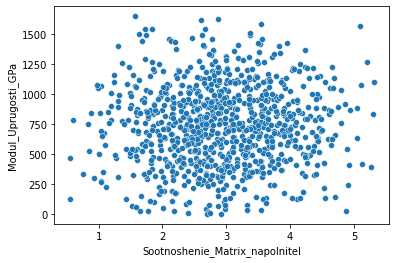

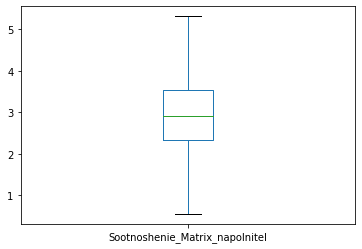




Plotnost_kg/m3


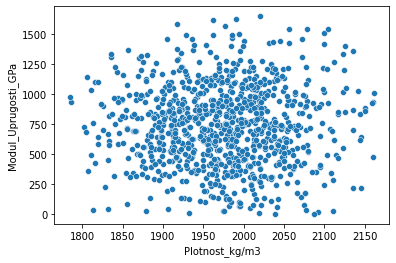

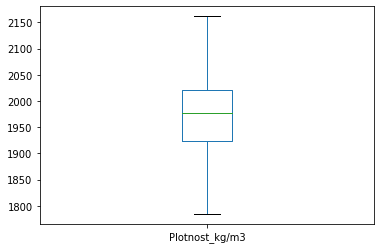




Modul_Uprugosti_GPa


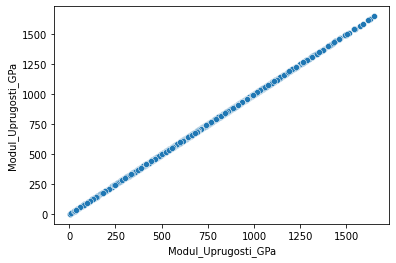

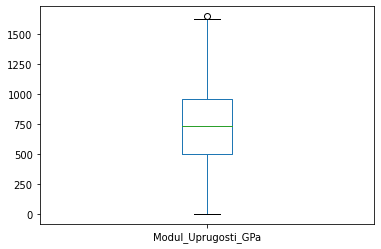




Kolichestvo_napolnitela_m%


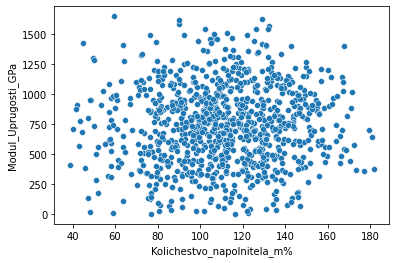

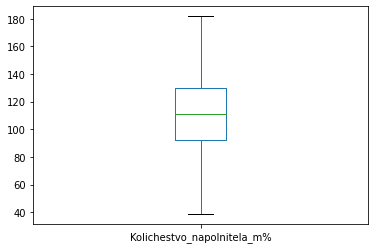




Soderjanie_epoxidnih_grupp_%_2


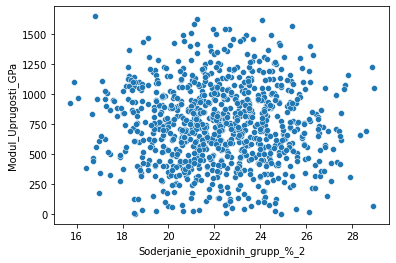

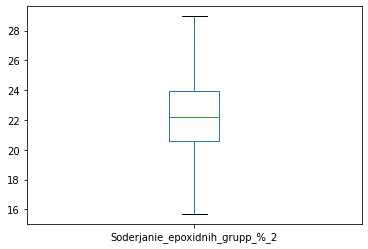




Temp_vspishki_C_2


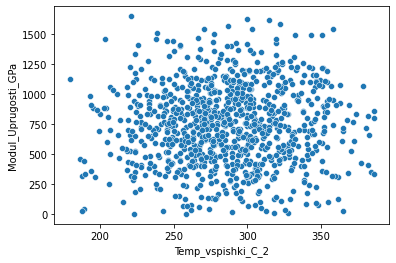

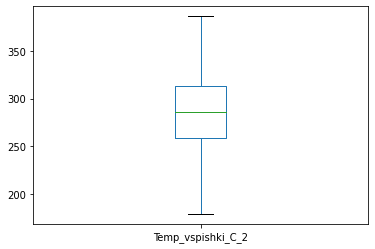




Poverhnostnaia_plotnost_g/m2


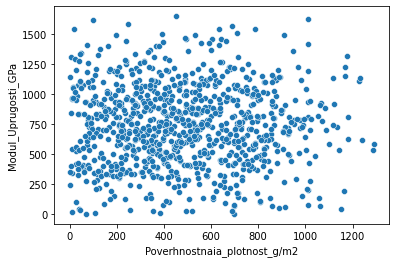

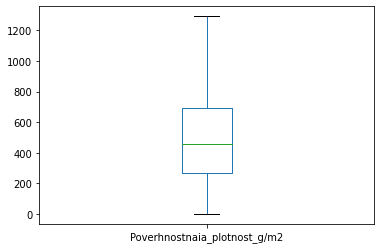




Modul_uprugosti_pri_rastiajenii_GPa


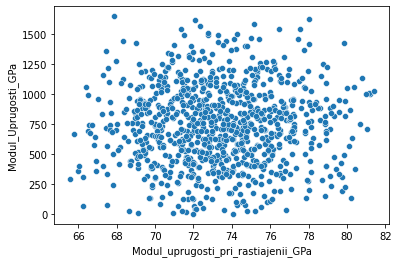

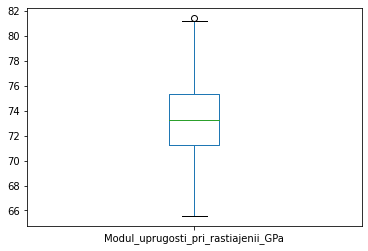




Prochnost_pri_rastiajenii_Mpa


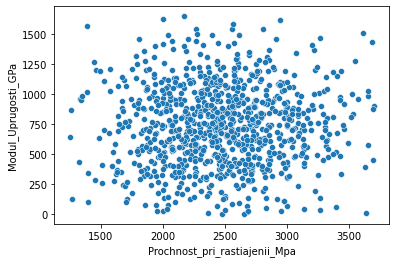

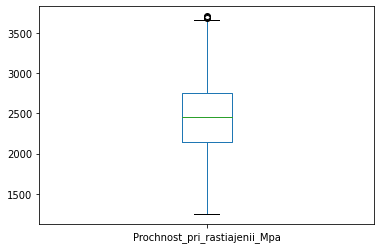




Potreblenie_smoli_g/m2


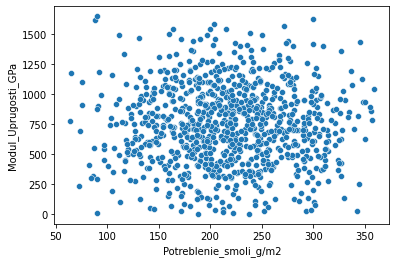

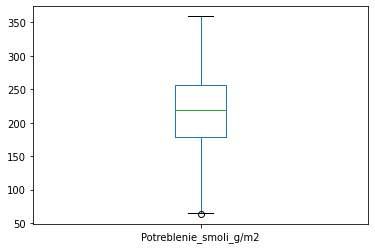




Ugol_nashivki_grad


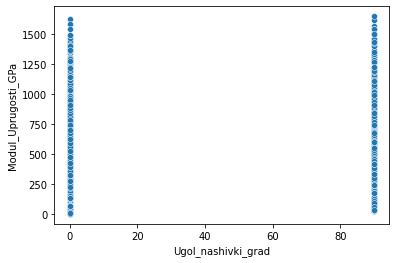

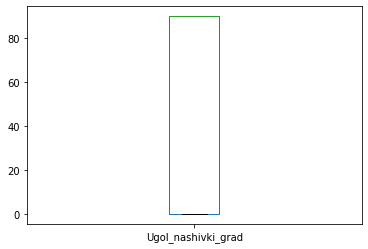




Shag_nashivki


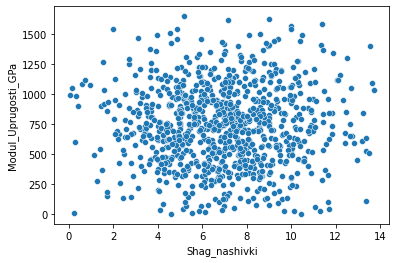

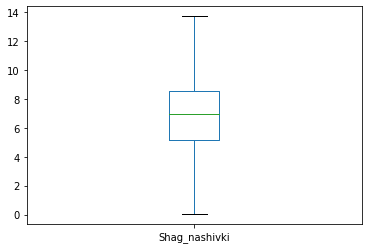




Plotnost_nashivki


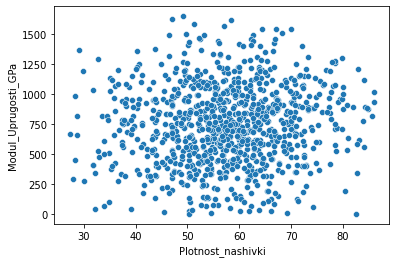

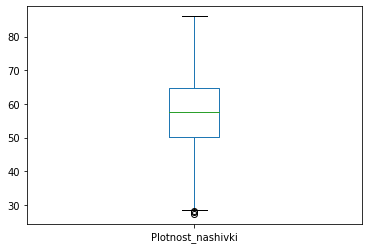

In [14]:
for column in dfp:
    print(column)
    sns.scatterplot(x = column , y = "Modul_Uprugosti_GPa", data = dfp);
    plt.show()
    dfp.boxplot(column = column, grid = False)
    plt.show()
    print('\n\n')

In [15]:
#Нормализация

scaler = MinMaxScaler()
col = dfp.columns
processed = scaler.fit_transform(dfp)
dfpm = pd.DataFrame(processed, columns = col)
dfpm

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
0                          0.274768        0.651097             0.447061   
1                          0.274768        0.651097             0.447061   
2                          0.466552        0.651097             0.455721   
3                          0.465836        0.571539             0.452685   
4                          0.424236        0.332865             0.488508   
..                              ...             ...                  ...   
931                        0.361662        0.444480             0.552781   
932                        0.607674        0.704373             0.268550   
933                        0.573391        0.498274             0.251612   
934                        0.662497        0.748688             0.448724   
935                        0.684036        0.280923             0.251903   

     Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
0                      0.079153                        0.607435   
1                      0.630983                        0.418887   
2                      0.511257                        0.495653   
3                      0.511257                        0.495653   
4                      0.511257                        0.495653   
..                          ...                             ...   
931                    0.337550                        0.333908   
932                    0.749605                        0.294428   
933                    0.501991                        0.623085   
934                    0.717585                        0.267818   
935                    0.632264                        0.888354   

     Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
0             0.509164                      0.162230   
1             0.583596                      0.162230   
2             0.509164                      0.162230   
3             0.509164                      0.162230   
4             0.509164                      0.162230   
..                 ...                           ...   
931           0.703458                      0.161609   
932           0.362087                      0.271207   
933           0.334063                      0.572959   
934           0.466417                      0.496511   
935           0.588206                      0.587373   

     Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
0                               0.280303                       0.712590   
1                               0.280303                       0.712590   
2                               0.280303                       0.712590   
3                               0.280303                       0.712590   
4                               0.280303                       0.712590   
..                                   ...                            ...   
931                             0.475147                       0.463043   
932                             0.464422                       0.452087   
933                             0.578740                       0.575296   
934                             0.535142                       0.334513   
935                             0.551972                       0.654075   

     Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
0                  0.529221                 0.0       0.289334   
1                  0.529221                 0.0       0.362355   
2                  0.529221                 0.0       0.362355   
3                  0.529221                 0.0       0.362355   
4                  0.529221                 0.0       0.362355   
..                      ...                 ...            ...   
931                0.207613                 1.0       0.660014   
932                0.182974                 1.0       0.768759   
933                0.585446                 1.0       0.301102   
934                0.451779                 1.0      

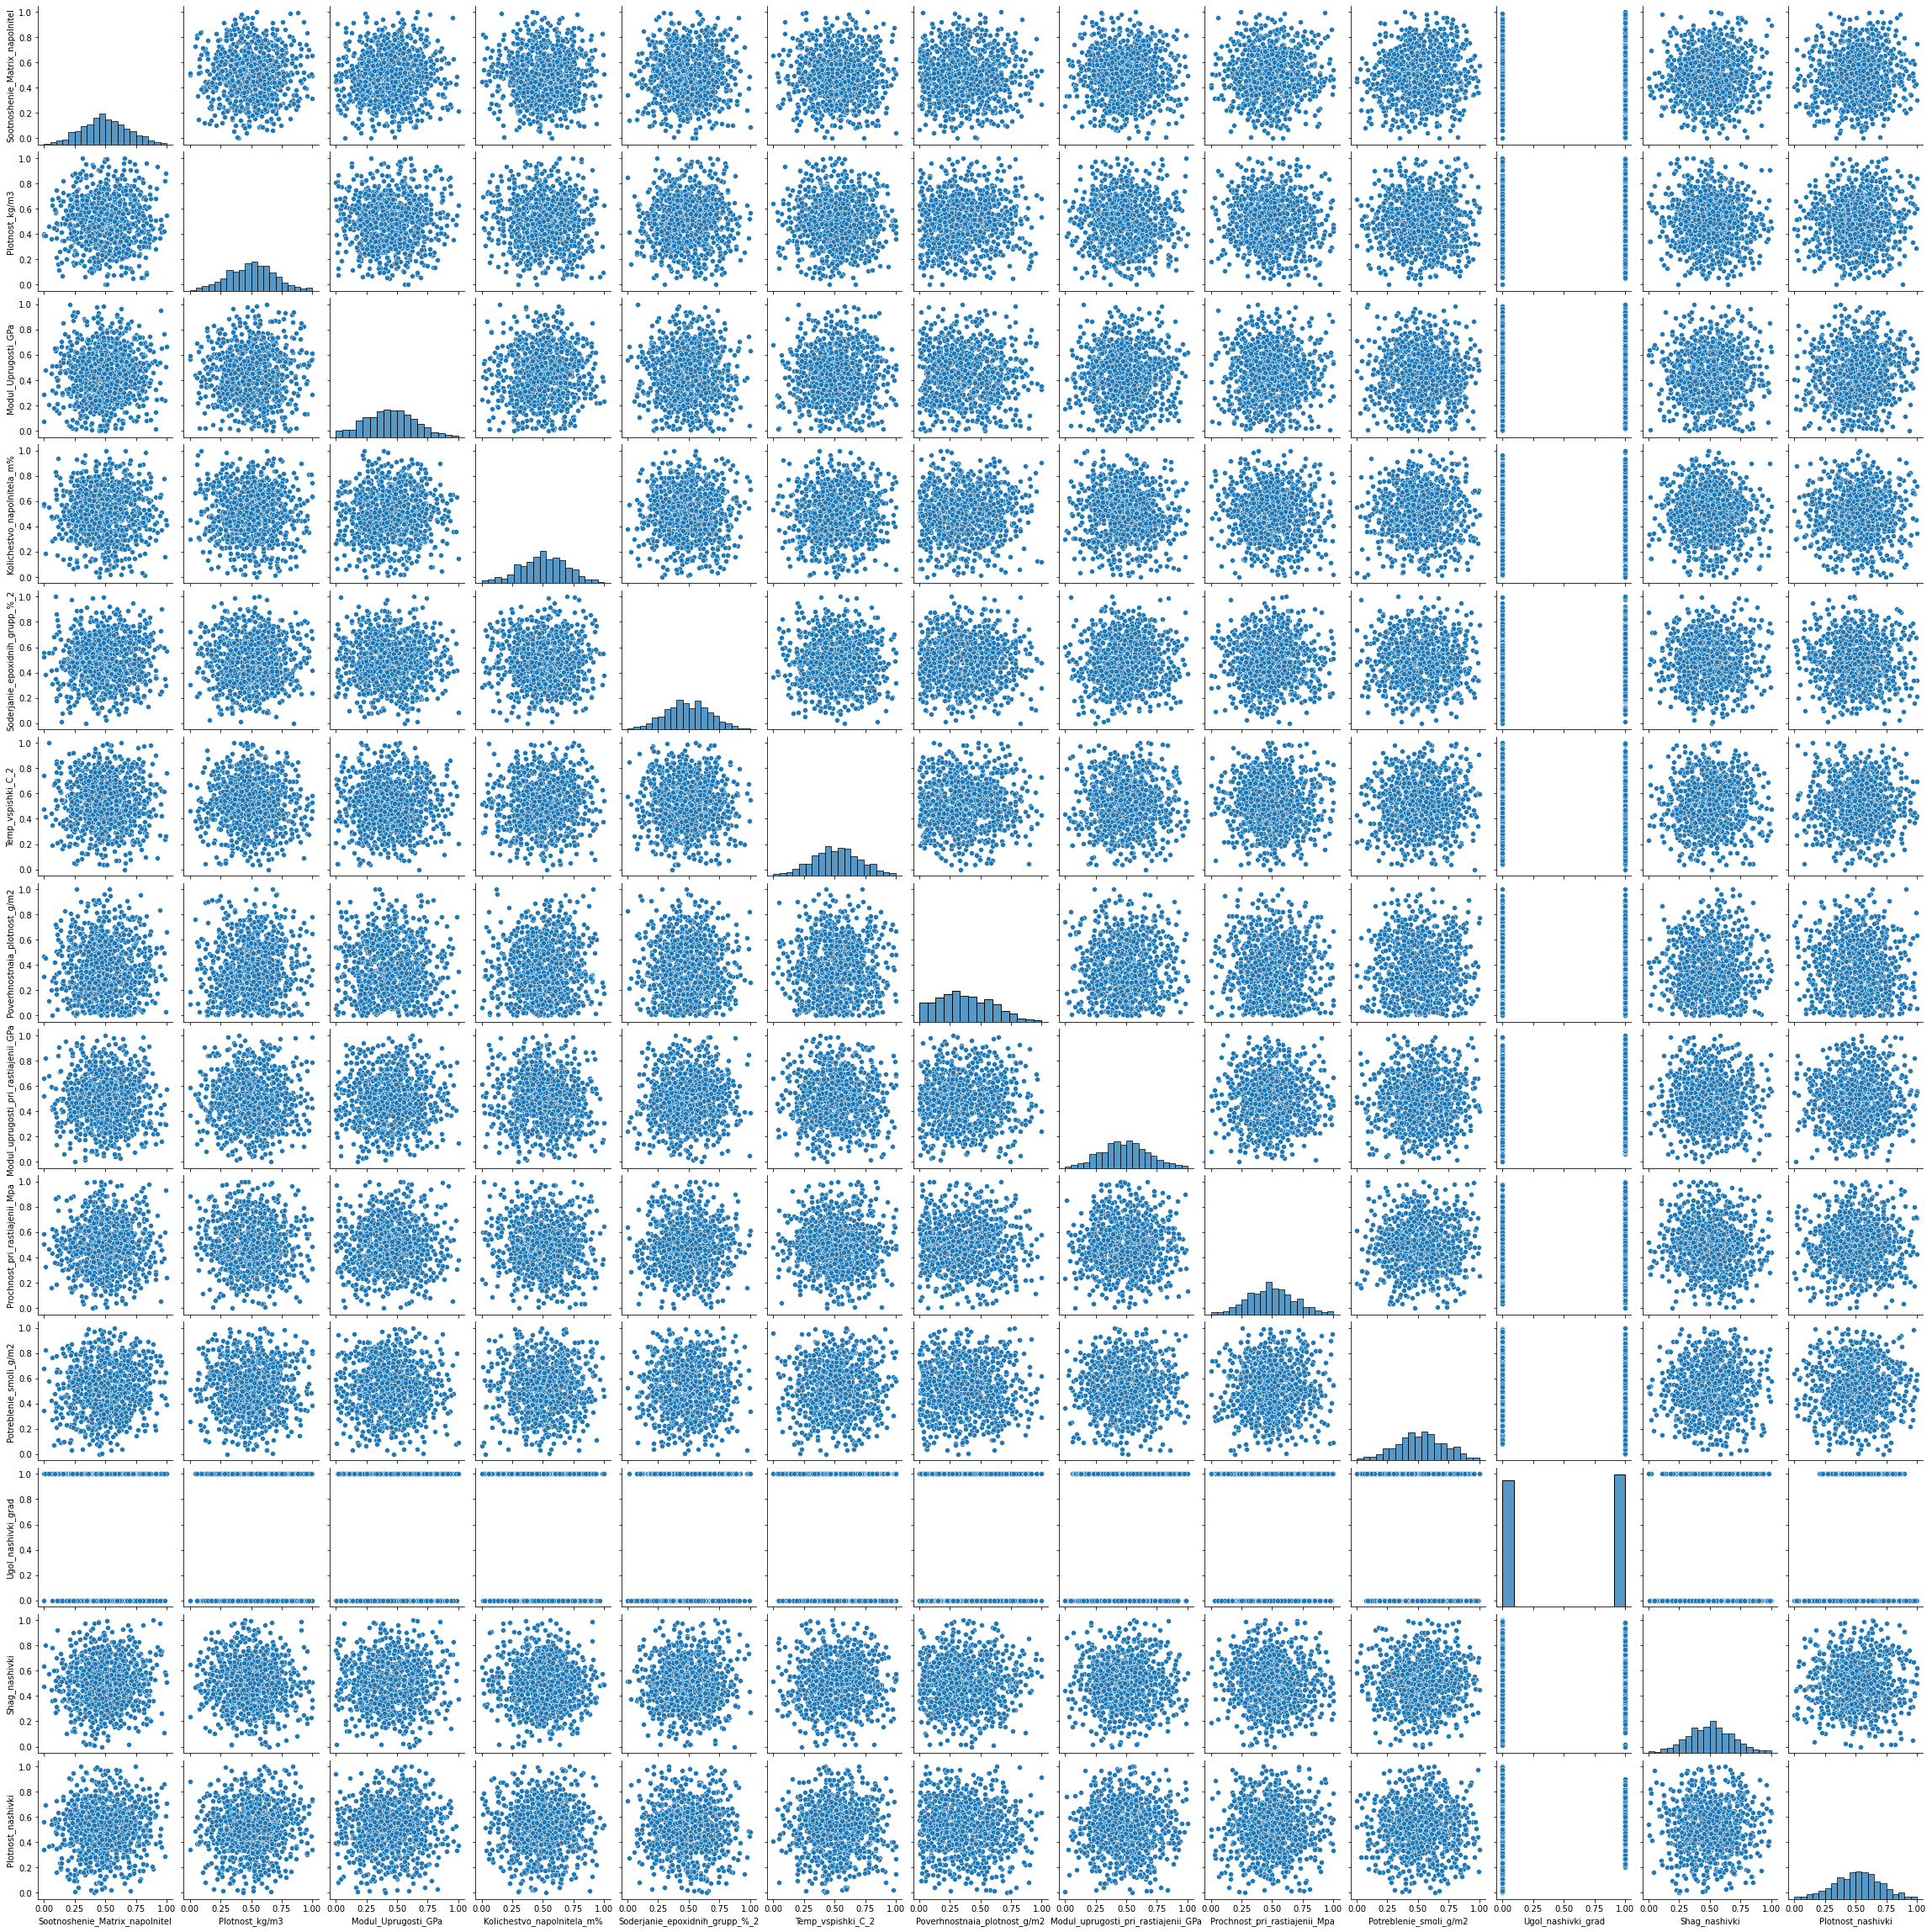

In [16]:
sns.pairplot(dfpm)
plt.savefig('matrix2.png')


In [17]:
dfpm.corr(method ='kendall')

Sootnoshenie_Matrix_napolnitel  \
Sootnoshenie_Matrix_napolnitel                             1.000000   
Plotnost_kg/m3                                            -0.005117   
Modul_Uprugosti_GPa                                        0.030893   
Kolichestvo_napolnitela_m%                                 0.008363   
Soderjanie_epoxidnih_grupp_%_2                             0.009016   
Temp_vspishki_C_2                                         -0.004727   
Poverhnostnaia_plotnost_g/m2                               0.005565   
Modul_uprugosti_pri_rastiajenii_GPa                       -0.011535   
Prochnost_pri_rastiajenii_Mpa                              0.012691   
Potreblenie_smoli_g/m2                                     0.037825   
Ugol_nashivki_grad                                        -0.028770   
Shag_nashivki                                              0.023249   
Plotnost_nashivki                                          0.028539   

                                     Plotnost_kg/m3  Modul_Uprugosti_GPa  \
Sootnoshenie_Matrix_napolnitel            -0.005117             0.030893   
Plotnost_kg/m3                             1.000000            -0.001289   
Modul_Uprugosti_GPa                       -0.001289             1.000000   
Kolichestvo_napolnitela_m%                -0.027568             0.025452   
Soderjanie_epoxidnih_grupp_%_2            -0.005243            -0.003757   
Temp_vspishki_C_2                         -0.018664             0.020001   
Poverhnostnaia_plotnost_g/m2               0.045844            -0.003892   
Modul_uprugosti_pri_rastiajenii_GPa       -0.026321             0.009935   
Prochnost_pri_rastiajenii_Mpa             -0.051662             0.025384   
Potreblenie_smoli_g/m2                    -0.011204             0.004228   
Ugol_nashivki_grad                        -0.046854            -0.024262   
Shag_nashivki                             -0.023247             0.001113   
Plotnost_nashivki                          0.054078             0.056594   

                                     Kolichestvo_napolnitela_m%  \
Sootnoshenie_Matrix_napolnitel                         0.008363   
Plotnost_kg/m3                                        -0.027568   
Modul_Uprugosti_GPa                                    0.025452   
Kolichestvo_napolnitela_m%                             1.000000   
Soderjanie_epoxidnih_grupp_%_2                         0.007458   
Temp_vspishki_C_2                                      0.057519   
Poverhnostnaia_plotnost_g/m2                           0.028708   
Modul_uprugosti_pri_rastiajenii_GPa                   -0.032045   
Prochnost_pri_rastiajenii_Mpa                         -0.037132   
Potreblenie_smoli_g/m2                                -0.010999   
Ugol_nashivki_grad                                     0.018267   
Shag_nashivki                                         -0.011214   
Plotnost_nashivki                                      0.008273   

                                     Soderjanie_epoxidnih_grupp_%_2  \
Sootnoshenie_Matrix_napolnitel                             0.009016   
Plotnost_kg/m3                                            -0.005243   
Modul_Uprugosti_GPa                                       -0.003757   
Kolichestvo_napolnitela_m%                                 0.007458   
Soderjanie_epoxidnih_grupp_%_2                             1.000000   
Temp_vspishki_C_2                                         -0.007104   
Poverhnostnaia_plotnost_g/m2                              -0.009015   
Modul_uprugosti_pri_rastiajenii_GPa                        0.039030   
Prochnost_pri_rastiajenii_Mpa                             -0.005938   
Potreblenie_smoli_g/m2                                     0.011264   
Ugol_nashivki_grad                                         0.019327   
Shag_nashivki                                             -0.004183   
Plotnost_nashivki                                         -0.019684   

                                     Temp_v

In [18]:
dfpm.corr(method ='pearson')

Sootnoshenie_Matrix_napolnitel  \
Sootnoshenie_Matrix_napolnitel                             1.000000   
Plotnost_kg/m3                                             0.001676   
Modul_Uprugosti_GPa                                        0.043888   
Kolichestvo_napolnitela_m%                                 0.007812   
Soderjanie_epoxidnih_grupp_%_2                             0.027587   
Temp_vspishki_C_2                                         -0.006275   
Poverhnostnaia_plotnost_g/m2                               0.007540   
Modul_uprugosti_pri_rastiajenii_GPa                       -0.019248   
Prochnost_pri_rastiajenii_Mpa                              0.024488   
Potreblenie_smoli_g/m2                                     0.075740   
Ugol_nashivki_grad                                        -0.035897   
Shag_nashivki                                              0.039109   
Plotnost_nashivki                                          0.052466   

                                     Plotnost_kg/m3  Modul_Uprugosti_GPa  \
Sootnoshenie_Matrix_napolnitel             0.001676             0.043888   
Plotnost_kg/m3                             1.000000             0.004326   
Modul_Uprugosti_GPa                        0.004326             1.000000   
Kolichestvo_napolnitela_m%                -0.050210             0.036523   
Soderjanie_epoxidnih_grupp_%_2            -0.001065            -0.013271   
Temp_vspishki_C_2                         -0.023507             0.029318   
Poverhnostnaia_plotnost_g/m2               0.062705            -0.008987   
Modul_uprugosti_pri_rastiajenii_GPa       -0.021316             0.021086   
Prochnost_pri_rastiajenii_Mpa             -0.076305             0.036641   
Potreblenie_smoli_g/m2                    -0.005133             0.004450   
Ugol_nashivki_grad                        -0.051336            -0.021886   
Shag_nashivki                             -0.045229             0.011345   
Plotnost_nashivki                          0.084077             0.078091   

                                     Kolichestvo_napolnitela_m%  \
Sootnoshenie_Matrix_napolnitel                         0.007812   
Plotnost_kg/m3                                        -0.050210   
Modul_Uprugosti_GPa                                    0.036523   
Kolichestvo_napolnitela_m%                             1.000000   
Soderjanie_epoxidnih_grupp_%_2                         0.011330   
Temp_vspishki_C_2                                      0.072273   
Poverhnostnaia_plotnost_g/m2                           0.046211   
Modul_uprugosti_pri_rastiajenii_GPa                   -0.048208   
Prochnost_pri_rastiajenii_Mpa                         -0.063256   
Potreblenie_smoli_g/m2                                -0.002268   
Ugol_nashivki_grad                                     0.026539   
Shag_nashivki                                         -0.021198   
Plotnost_nashivki                                      0.001485   

                                     Soderjanie_epoxidnih_grupp_%_2  \
Sootnoshenie_Matrix_napolnitel                             0.027587   
Plotnost_kg/m3                                            -0.001065   
Modul_Uprugosti_GPa                                       -0.013271   
Kolichestvo_napolnitela_m%                                 0.011330   
Soderjanie_epoxidnih_grupp_%_2                             1.000000   
Temp_vspishki_C_2                                         -0.019085   
Poverhnostnaia_plotnost_g/m2                              -0.013065   
Modul_uprugosti_pri_rastiajenii_GPa                        0.055271   
Prochnost_pri_rastiajenii_Mpa                             -0.007097   
Potreblenie_smoli_g/m2                                     0.011575   
Ugol_nashivki_grad                                         0.026645   
Shag_nashivki                                              0.004465   
Plotnost_nashivki                                         -0.036126   

                                     Temp_v

In [19]:
#Входные и выходные данные
inputcol = ['Plotnost_kg/m3', 'Modul_Uprugosti_GPa', 'Kolichestvo_napolnitela_m%', 'Soderjanie_epoxidnih_grupp_%_2', 
            'Temp_vspishki_C_2', 'Poverhnostnaia_plotnost_g/m2', 'Potreblenie_smoli_g/m2', 'Ugol_nashivki_grad', 
            'Shag_nashivki', 'Plotnost_nashivki']
result = ['Sootnoshenie_Matrix_napolnitel', 'Modul_uprugosti_pri_rastiajenii_GPa', 'Prochnost_pri_rastiajenii_Mpa']
X_train = dfpm[inputcol]
y_train = dfpm[result]

In [20]:
#Разбиваем на тренировочную и тестовую выборку
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X_train, y_train, test_size=0.3)

In [21]:
print(Xtest)

     Plotnost_kg/m3  Modul_Uprugosti_GPa  Kolichestvo_napolnitela_m%  \
728        0.709517             0.493270                    0.503083   
128        0.335126             0.502265                    0.582870   
733        0.478057             0.227153                    0.750416   
79         0.617164             0.593664                    0.426142   
248        0.569006             0.651021                    0.561980   
..              ...                  ...                         ...   
823        0.470143             0.084886                    0.748675   
58         0.353507             0.462878                    0.370158   
567        0.360882             0.228841                    0.452929   
549        0.463619             0.679500                    0.235265   
680        0.848580             0.935402                    0.443276   

     Soderjanie_epoxidnih_grupp_%_2  Temp_vspishki_C_2  \
728                        0.470370           0.834071   
128                

In [22]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
#from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import joblib


In [23]:
def create_model(lyrs=[32], act='softmax', opt='SGD', dr=0.5):
    
    seed = 7
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
    model = Sequential()
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act)) 
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    model.add(Dropout(dr))
    model.add(Dense(3, activation='tanh'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['mae', 'accuracy'])
 
    return model

In [24]:
# create model
model2 = KerasRegressor(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [4, 10, 20, 50, 100]
epochs = [10, 50, 100, 200, 300]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model2, 
                    param_grid=param_grid,
                    cv=10,
                    verbose=1, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [25]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.693199 using {'batch_size': 4, 'epochs': 100}
-1.142380 (0.898469) with: {'batch_size': 4, 'epochs': 10}
-0.693239 (0.000382) with: {'batch_size': 4, 'epochs': 50}
-0.693199 (0.000377) with: {'batch_size': 4, 'epochs': 100}
-0.693213 (0.000383) with: {'batch_size': 4, 'epochs': 200}
-0.693204 (0.000390) with: {'batch_size': 4, 'epochs': 300}
-0.693221 (0.000287) with: {'batch_size': 10, 'epochs': 10}
-0.693229 (0.000310) with: {'batch_size': 10, 'epochs': 50}
-0.693241 (0.000291) with: {'batch_size': 10, 'epochs': 100}
-0.693222 (0.000328) with: {'batch_size': 10, 'epochs': 200}
-0.693224 (0.000331) with: {'batch_size': 10, 'epochs': 300}
-0.695673 (0.003945) with: {'batch_size': 20, 'epochs': 10}
-0.693227 (0.000279) with: {'batch_size': 20, 'epochs': 50}
-0.693267 (0.000260) with: {'batch_size': 20, 'epochs': 100}
-0.693236 (0.000323) with: {'batch_size': 20, 'epochs': 200}
-0.693241 (0.000313) with: {'batch_size': 20, 'epochs': 300}
-0.700491 (0.005404) with: {'batch_size':

In [28]:
# create model
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=4, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ............................................opt=SGD; total time=  16.0s
[CV] END ............................................opt=SGD; total time=  16.6s
[CV] END ............................................opt=SGD; total time=  14.6s
[CV] END ............................................opt=SGD; total time=  12.9s
[CV] END ............................................opt=SGD; total time=  14.3s
[CV] END ............................................opt=SGD; total time=  14.9s
[CV] END ............................................opt=SGD; total time=  14.0s
[CV] END ............................................opt=SGD; total time=  14.1s
[CV] END ............................................opt=SGD; total time=  15.8s
[CV] END ............................................opt=SGD; total time=  14.6s
[CV] END ........................................opt=RMSprop; total time=  16.6s
[CV] END .......................................

In [29]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.693199 using {'opt': 'SGD'}
-0.693199 (0.000377) with: {'opt': 'SGD'}
-0.693541 (0.001075) with: {'opt': 'RMSprop'}
-2.734039 (1.102581) with: {'opt': 'Adagrad'}
-5.610957 (0.133364) with: {'opt': 'Adadelta'}
-0.693334 (0.001192) with: {'opt': 'Adam'}
-0.693411 (0.001121) with: {'opt': 'Nadam'}


In [30]:
# create model
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=4, verbose=0)

# define the grid search parameters
layers = [[8],[16, 4],[32, 8, 3],[12, 6, 3], [64, 64, 3], [128, 64, 16, 3]]
param_grid = dict(lyrs=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ...........................................lyrs=[8]; total time=  14.9s
[CV] END ...........................................lyrs=[8]; total time=  14.9s
[CV] END ...........................................lyrs=[8]; total time=  13.0s
[CV] END ...........................................lyrs=[8]; total time=  12.8s
[CV] END ...........................................lyrs=[8]; total time=  16.3s
[CV] END ...........................................lyrs=[8]; total time=  15.2s
[CV] END ...........................................lyrs=[8]; total time=  13.5s
[CV] END ...........................................lyrs=[8]; total time=  12.7s
[CV] END ...........................................lyrs=[8]; total time=  13.1s
[CV] END ...........................................lyrs=[8]; total time=  13.8s
[CV] END .......................................lyrs=[16, 4]; total time=  14.7s
[CV] END .......................................

In [31]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.693161 using {'lyrs': [16, 4]}
-1.856434 (1.162776) with: {'lyrs': [8]}
-0.693161 (0.000325) with: {'lyrs': [16, 4]}
-1.415148 (1.104596) with: {'lyrs': [32, 8, 3]}
-0.923789 (0.691997) with: {'lyrs': [12, 6, 3]}
-1.131516 (0.881262) with: {'lyrs': [64, 64, 3]}
-3.265095 (0.721553) with: {'lyrs': [128, 64, 16, 3]}


In [32]:
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=4, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(act=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(X_train, y_train)

In [33]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.693199 using {'act': 'softmax'}
-0.693199 (0.000377) with: {'act': 'softmax'}
-2.322573 (2.332664) with: {'act': 'softplus'}
-0.918239 (0.673499) with: {'act': 'softsign'}
-0.930366 (0.708619) with: {'act': 'relu'}
-0.920090 (0.679245) with: {'act': 'tanh'}
-1.383073 (1.053954) with: {'act': 'sigmoid'}
-1.410379 (1.096425) with: {'act': 'hard_sigmoid'}
-0.693738 (0.001242) with: {'act': 'linear'}


In [34]:
# create model
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=4, verbose=0)

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] END .............................................dr=0.0; total time=  15.7s
[CV] END .............................................dr=0.0; total time=  13.0s
[CV] END .............................................dr=0.0; total time=  12.6s
[CV] END .............................................dr=0.0; total time=  16.2s
[CV] END .............................................dr=0.0; total time=  15.9s
[CV] END .............................................dr=0.0; total time=  14.2s
[CV] END .............................................dr=0.0; total time=  16.0s
[CV] END .............................................dr=0.0; total time=  16.9s
[CV] END .............................................dr=0.0; total time=  13.1s
[CV] END .............................................dr=0.0; total time=  14.2s
[CV] END ............................................dr=0.01; total time=  13.6s
[CV] END .......................................

In [35]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.693175 using {'dr': 0.5}
-5.308953 (0.131274) with: {'dr': 0.0}
-2.974792 (0.094692) with: {'dr': 0.01}
-0.693220 (0.000373) with: {'dr': 0.05}
-0.693199 (0.000377) with: {'dr': 0.1}
-0.693196 (0.000367) with: {'dr': 0.2}
-0.693191 (0.000365) with: {'dr': 0.3}
-0.693175 (0.000360) with: {'dr': 0.5}


In [36]:
# create final model
model = create_model(lyrs=[16, 4], dr=0.5)

print(model.summary())

Model: "sequential_256"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_613 (Dense)            (None, 16)                176       
_________________________________________________________________
dense_614 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_256 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_615 (Dense)            (None, 3)                 15        
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
# train model on full train set, with 80/20 CV split
training = model.fit(Xtrn, Ytrn, epochs=100, batch_size=4, 
                     validation_split=0.2, verbose=1)


Epoch 1/100
131/131 [==============================] - 0s 2ms/step - loss: 0.6932 - mae: 0.1514 - accuracy: 0.3702 - val_loss: 0.6935 - val_mae: 0.1512 - val_accuracy: 0.2748
Epoch 2/100
131/131 [==============================] - 0s 1ms/step - loss: 0.6931 - mae: 0.1513 - accuracy: 0.3244 - val_loss: 0.6937 - val_mae: 0.1515 - val_accuracy: 0.3206
Epoch 3/100
131/131 [==============================] - 0s 1ms/step - loss: 0.6932 - mae: 0.1512 - accuracy: 0.3473 - val_loss: 0.6937 - val_mae: 0.1514 - val_accuracy: 0.2901
Epoch 4/100
131/131 [==============================] - 0s 1ms/step - loss: 0.6931 - mae: 0.1514 - accuracy: 0.3302 - val_loss: 0.6937 - val_mae: 0.1515 - val_accuracy: 0.3130
Epoch 5/100
131/131 [==============================] - 0s 1ms/step - loss: 0.6932 - mae: 0.1514 - accuracy: 0.3263 - val_loss: 0.6936 - val_mae: 0.1514 - val_accuracy: 0.3130
Epoch 6/100
131/131 [==============================] - 0s 1ms/step - loss: 0.6931 - mae: 0.1514 - accuracy: 0.3454 - val_loss

131/131 [==============================] - 0s 1ms/step - loss: 0.6932 - mae: 0.1513 - accuracy: 0.3550 - val_loss: 0.6936 - val_mae: 0.1513 - val_accuracy: 0.3130
Epoch 48/100
131/131 [==============================] - 0s 1ms/step - loss: 0.6931 - mae: 0.1512 - accuracy: 0.3473 - val_loss: 0.6936 - val_mae: 0.1513 - val_accuracy: 0.3130
Epoch 49/100
131/131 [==============================] - 0s 1ms/step - loss: 0.6932 - mae: 0.1512 - accuracy: 0.3645 - val_loss: 0.6935 - val_mae: 0.1512 - val_accuracy: 0.3130
Epoch 50/100
131/131 [==============================] - 0s 1ms/step - loss: 0.6932 - mae: 0.1514 - accuracy: 0.3626 - val_loss: 0.6936 - val_mae: 0.1513 - val_accuracy: 0.3130
Epoch 51/100
131/131 [==============================] - 0s 1ms/step - loss: 0.6931 - mae: 0.1513 - accuracy: 0.3378 - val_loss: 0.6935 - val_mae: 0.1512 - val_accuracy: 0.3130
Epoch 52/100
131/131 [==============================] - 0s 1ms/step - loss: 0.6931 - mae: 0.1513 - accuracy: 0.3588 - val_loss: 0.693

131/131 [==============================] - 0s 1ms/step - loss: 0.6931 - mae: 0.1514 - accuracy: 0.3397 - val_loss: 0.6936 - val_mae: 0.1513 - val_accuracy: 0.3130
Epoch 94/100
131/131 [==============================] - 0s 1ms/step - loss: 0.6931 - mae: 0.1513 - accuracy: 0.3473 - val_loss: 0.6935 - val_mae: 0.1512 - val_accuracy: 0.3130
Epoch 95/100
131/131 [==============================] - 0s 1ms/step - loss: 0.6931 - mae: 0.1513 - accuracy: 0.3416 - val_loss: 0.6936 - val_mae: 0.1513 - val_accuracy: 0.2901
Epoch 96/100
131/131 [==============================] - 0s 1ms/step - loss: 0.6930 - mae: 0.1513 - accuracy: 0.3244 - val_loss: 0.6939 - val_mae: 0.1517 - val_accuracy: 0.3130
Epoch 97/100
131/131 [==============================] - 0s 1ms/step - loss: 0.6931 - mae: 0.1512 - accuracy: 0.3416 - val_loss: 0.6936 - val_mae: 0.1514 - val_accuracy: 0.3130
Epoch 98/100
131/131 [==============================] - 0s 1ms/step - loss: 0.6931 - mae: 0.1512 - accuracy: 0.3416 - val_loss: 0.693

In [45]:
# evaluate the model
scores = model.evaluate(Xtest, Ytest)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9/9 [==============================] - 0s 1ms/step - loss: 0.6932 - mae: 0.1530 - accuracy: 0.2989

mae: 15.30%


In [ ]:
#Ввод данных пользователем dfuser
#dfuser = dfp.copy(deep = True)
#dfuser = dfuser.reset_index()
#dfuser = dfuser.drop(labels=range(1, 936), axis=0)
#dfuser.drop(['index'], inplace=True, axis=1)

dfuser = pd.DataFrame({'Sootnoshenie_Matrix_napolnitel' : [0.0], 'Plotnost_kg/m3' : [0.0], 
            'Modul_Uprugosti_GPa' : [0.0], 'Kolichestvo_napolnitela_m%' : [0.0], 
            'Soderjanie_epoxidnih_grupp_%_2' : [0.0], 'Temp_vspishki_C_2' : [0.0], 
            'Poverhnostnaia_plotnost_g/m2' : [0.0], 'Modul_uprugosti_pri_rastiajenii_GPa' : [0.0], 
            'Prochnost_pri_rastiajenii_Mpa' : [0.0], 'Potreblenie_smoli_g/m2' : [0.0], 
            'Ugol_nashivki_grad' : [0.0], 'Shag_nashivki' : [0.0], 'Plotnost_nashivki' : [0.0]})
col = dfuser.columns

print('Введите параметры:') 
a = 0 
for i in column: 
    if a != 0 and a != 7 and a !=8: 
        print(col[a]) 
        y = input() 
        dfuser[col[a]].values[0] = float(y) 
    else: 
        dfuser[col[a]].values[0] = 0 
    a+=1
    if a == 13:
        break
    

In [ ]:
dfuser

In [ ]:
#Нормализация with MinMaxScaler

modified = scaler.transform(dfuser)
dfuser_modified = pd.DataFrame(modified, columns = col)
dfuser_modified.drop(['Sootnoshenie_Matrix_napolnitel', 'Modul_uprugosti_pri_rastiajenii_GPa', 'Prochnost_pri_rastiajenii_Mpa'], inplace=True, axis=1)
dfuser_modified

In [ ]:
pred = model.predict(dfuser_modified)

In [ ]:
print(pred)

In [ ]:
pred[0][1]

In [ ]:
pred_inversed = pd.DataFrame([])
pred_inversed.at[0,0] = float(pred[0][0])

for i in range(1, 13):
    p = 0
    pred_inversed.at[0,i] = float(p)
pred_inversed.at[0,7] = float(pred[0][1])
pred_inversed.at[0,8] = float(pred[0][2])
pred_inversed

In [ ]:
#Возвращает предсказанное значание (в размерности до нормализации)
Y_trans = scaler.inverse_transform(pred_inversed)

print(Y_trans[0,0], Y_trans[0,7], Y_trans[0,8])

In [39]:
model.save('models/VKR_mlp_var1-reg')

INFO:tensorflow:Assets written to: models/VKR_mlp_var1-reg\assets


In [40]:
# save the scaler
joblib.dump(scaler, open('scaler-reg.pkl', 'wb'))

In [41]:
print(keras.__version__)

2.6.0
